# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [48]:
import numpy  as np  
import pandas as pd
import matplotlib.pyplot as plt
import mlflow 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from functions import *

# Intro
For this exercise, I am going to use a familiar data set previously used in the module of 'machine learning'. This will allow me to speed up the EDA step for the data and at the same time, explore further into the models used and parameters that I did not have the time to explore when working on that module.

# EDA

This part I did exahutively during the exercise for the module of Machine Learning.
Please, refer to the following link to the notebook with EDA on the dataset of Airbnb properties: https://github.com/SCaRreC/Machine_learning/blob/main/Practica_Machine_Learning.ipynb.


# From code in cells to scrips in functions

For the rest of the notebook, I tried to integrate the code I had in sepparate cells (also in the Machine Learning notebook), into functions that would do all the transformations at once.

All funtions are described in the [functions.py](/Users/saracarcamo/Documents/KeepCoding/Modulos_Bootcamp/mlops/functions.py) file.



In [49]:
# Data loading and selection of columns to work with. Removal of NAs in the Target (Price).
path = "/Users/saracarcamo/Documents/KeepCoding/Practicas/Machine_learning/airbnb-listings-extract.csv"
df = load_dataset(path)

In [50]:
df.head(5).T


,1,2,3,4,5
Neighbourhood Cleansed,la Dreta de l'Eixample,la Dreta de l'Eixample,la Dreta de l'Eixample,l'Antiga Esquerra de l'Eixample,la Nova Esquerra de l'Eixample
Smart Location,"Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain"
Latitude,41.389683,41.393035,41.396967,41.388685,41.382537
Longitude,2.172625,2.162173,2.167418,2.15515,2.149577
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Bathrooms,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,1.0,3.0,2.0,2.0
Beds,1.0,1.0,4.0,2.0,3.0
Guests Included,2,2,2,1,1
Extra People,44,42,39,0,0


In [51]:
df.shape

(13990, 15)

In [52]:
df.isnull().sum()

Neighbourhood Cleansed     0
Smart Location             0
Latitude                   0
Longitude                  0
Property Type              0
Bathrooms                 51
Bedrooms                  24
Beds                      48
Guests Included            0
Extra People               0
Minimum Nights             0
Maximum Nights             0
Number of Reviews          0
Room Type                  0
Price                      0
dtype: int64

In [53]:
x_train, x_test, y_train, y_test = create_train_test(df)

In [54]:
x_train, tar_encoder, one_encoder = preprocess_data_train(x_train, y_train)

In [55]:
x_train.head().T

,12828,11101,11026,3874,3733
Neighbourhood Cleansed,4.088924,4.197908,4.310793,4.056921,3.382911
Smart Location,3.973793,3.974388,3.974388,3.974388,3.974520
Latitude,40.428537,40.416091,40.420104,40.430953,40.408729
Longitude,-3.708132,-3.709490,-3.704164,-3.675646,-3.742796
Property Type,4.029589,4.029165,4.029165,4.029165,4.028577
Bathrooms,1.000000,1.000000,3.000000,1.000000,1.000000
Bedrooms,2.000000,1.000000,1.000000,1.000000,4.000000
Beds,4.000000,3.000000,1.000000,1.000000,6.000000
Guests Included,6.000000,1.000000,1.000000,1.000000,8.000000
Extra People,0.000000,0.000000,5.000000,0.000000,5.000000


In [56]:
x_train.isnull().sum()

Neighbourhood Cleansed    0
Smart Location            0
Latitude                  0
Longitude                 0
Property Type             0
Bathrooms                 0
Bedrooms                  0
Beds                      0
Guests Included           0
Extra People              0
Minimum Nights            0
Maximum Nights            0
Number of Reviews         0
Room Type_Private room    0
Room Type_Shared room     0
dtype: int64

In [57]:
x_test = preprocess_data_test(x_test, x_train, y_train, tar_encoder, one_encoder)

In [58]:
# Scale data in x
x_train_scaled, x_test_scaled = Scale_numeric_var(x_train, x_test)

In [59]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(11192, 14)
(2798, 14)


In [63]:
name = 'airbnb_price_model_v3'
n_estimators = (300, 500, 100)
max_depth = (5, 10, 5)
min_samples_leaf = (5, 20, 5)

## main.py file

Args: 
    main(
    * path='/path/to/your/.csv/file',
    * experiment_name='experimento_test',
    * n_estimators='tuple for range of parameters to try',
    * max_depth='tuple for range of parameters to try',
    * min_samples_leaf='tuple for range of parameters to try'
)

In [64]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [65]:
mlflow_tracking(name, x_train, x_test, y_train, y_test, n_estimators, max_depth, min_samples_leaf)

2025/07/05 12:53:00 INFO mlflow.tracking.fluent: Experiment with name 'airbnb_price_model_v3' does not exist. Creating a new experiment.
2025/07/05 12:53:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_300_estimators_5_depth_sample_leaf5 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/3271a4f4f0cb46f2ae1b501ed40b7c97
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373


2025/07/05 12:53:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_300_estimators_5_depth_sample_leaf10 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/08b6e3665afa4fadb00f2ff1660af64f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373


2025/07/05 12:53:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_300_estimators_5_depth_sample_leaf15 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/e0c62becdc784c37ade72cec6ccb477f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373


2025/07/05 12:53:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_400_estimators_5_depth_sample_leaf5 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/ad949e5923e849869339a3fd4aeebe13
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373


2025/07/05 12:53:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_400_estimators_5_depth_sample_leaf10 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/c92acefa52c74e529792377538130009
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373


2025/07/05 12:53:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 12:53:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_400_estimators_5_depth_sample_leaf15 at: http://127.0.0.1:5000/#/experiments/683241590948331373/runs/40ae61309ba84975afb992b0cdf1fc03
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/683241590948331373
Se ha acabado el entrenamiento del modelo correctamente


![Screenshot 2025-07-03 at 23.04.36.png](<attachment:Screenshot 2025-07-03 at 23.04.36.png>) ![Screenshot 2025-07-03 at 23.04.55.png](<attachment:Screenshot 2025-07-03 at 23.04.55.png>)
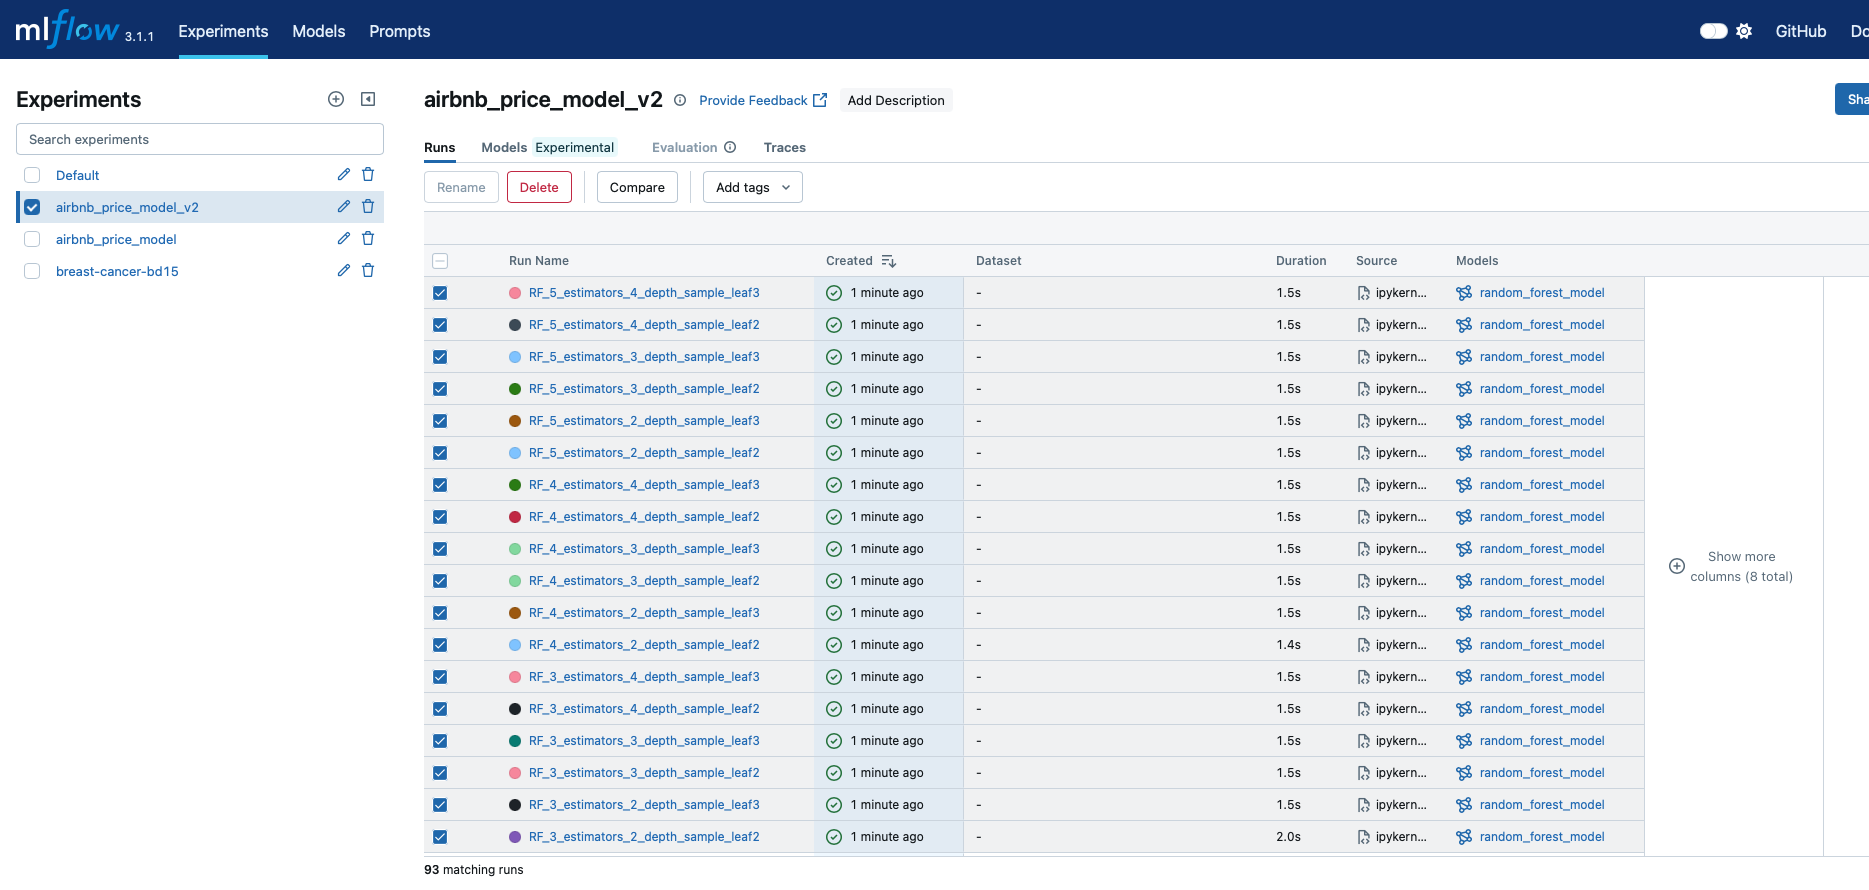
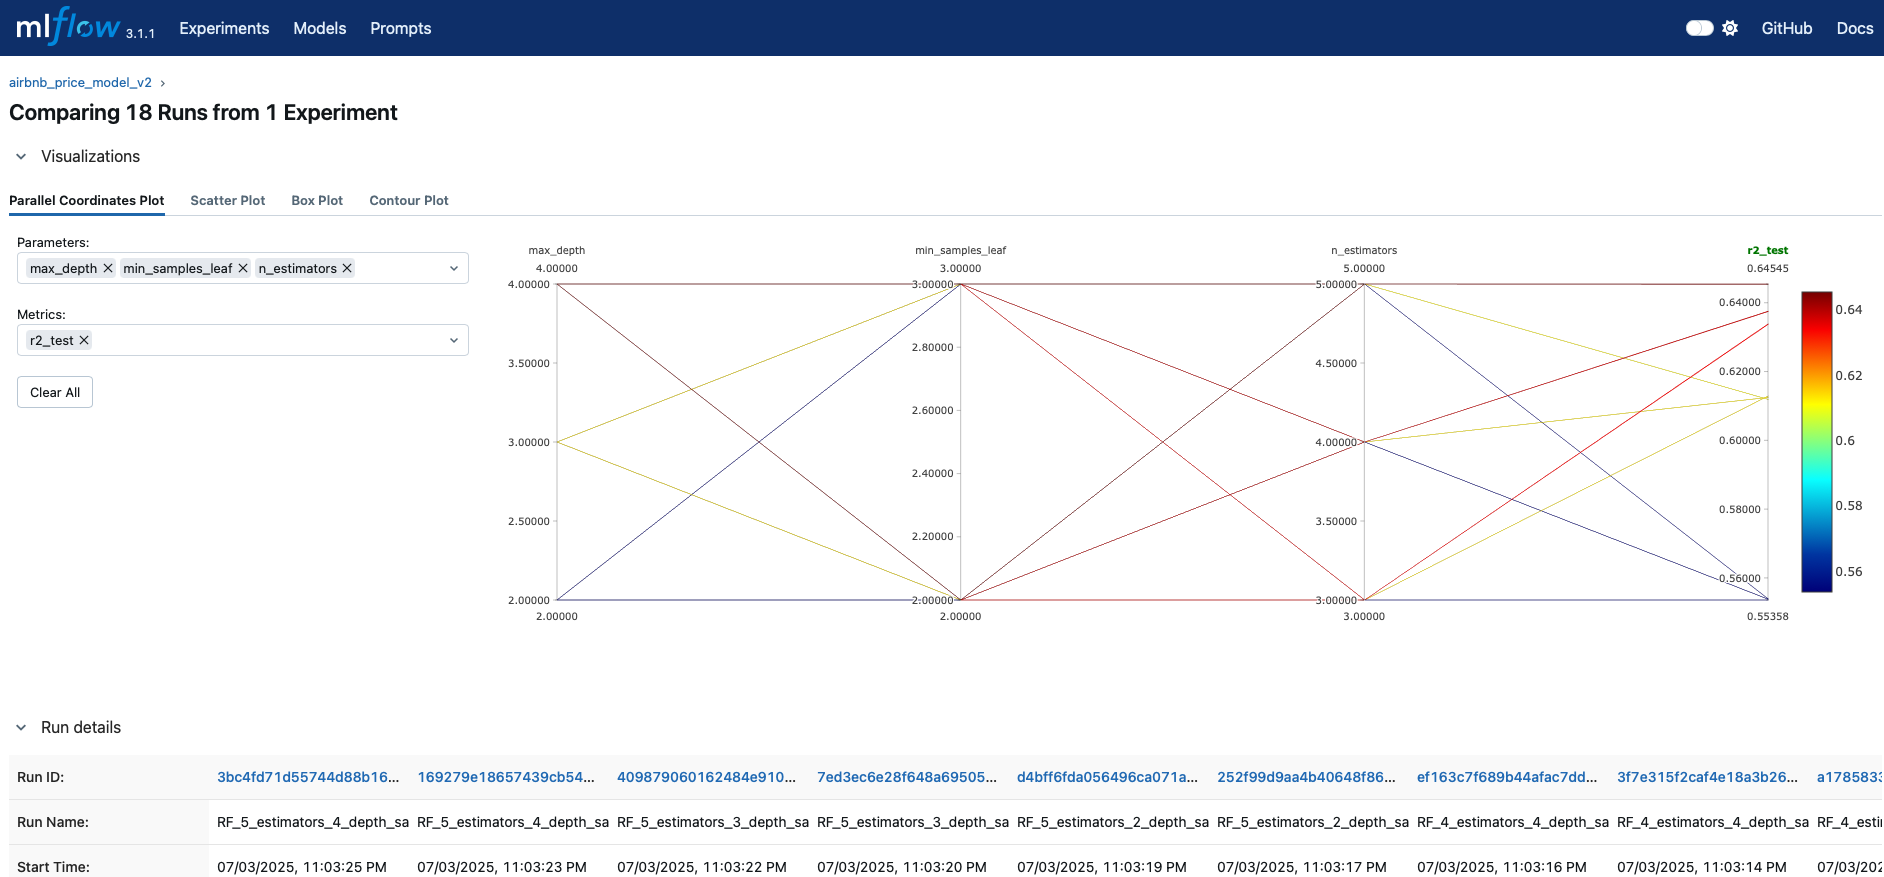

![Screenshot 2025-07-05 at 13.00.43.png](<attachment:Screenshot 2025-07-05 at 13.00.43.png>)
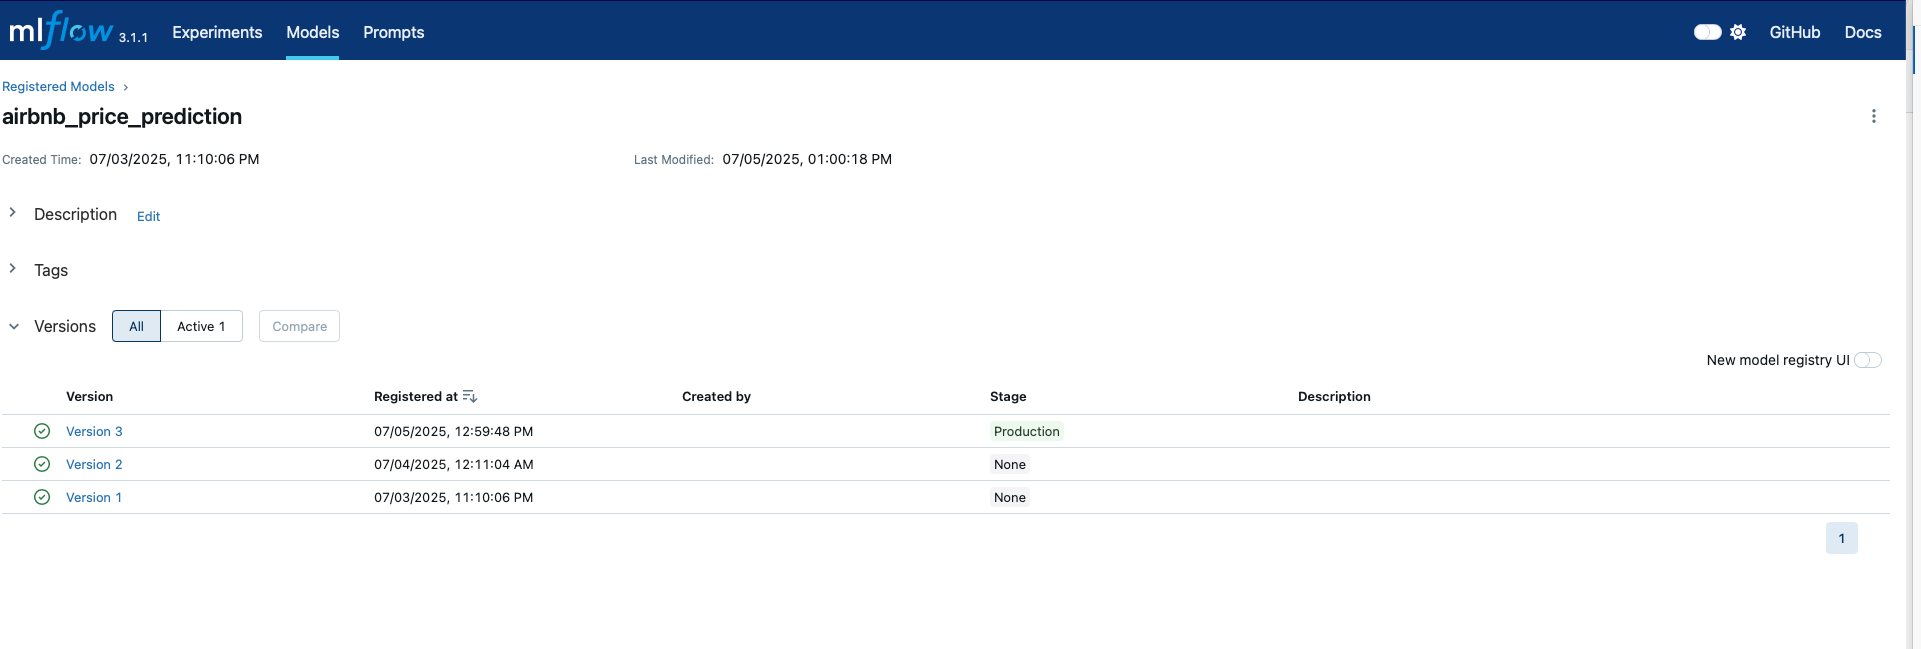